# Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skopt import BayesSearchCV
import skopt
import warnings
import datetime

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("../data/advanced_train.csv", low_memory = False)
test = pd.read_csv("../data/advanced_test.csv", low_memory = False)
sample = pd.read_csv("../data/sample_submission.csv", low_memory = False)

In [4]:
train.shape, test.shape

((37439, 40), (10000, 39))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37439 entries, 0 to 37438
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           37439 non-null  int64  
 1   Sold Price                   37439 non-null  int64  
 2   Summary                      37176 non-null  object 
 3   Type                         37439 non-null  object 
 4   Year built                   36686 non-null  float64
 5   Heating                      32481 non-null  object 
 6   Cooling                      29109 non-null  object 
 7   Parking                      36720 non-null  object 
 8   Lot                          26041 non-null  float64
 9   Bedrooms                     35235 non-null  object 
 10  Bathrooms                    34786 non-null  float64
 11  Full bathrooms               31696 non-null  float64
 12  Total interior livable area  35443 non-null  float64
 13  Total spaces    

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           10000 non-null  int64  
 1   Summary                      9913 non-null   object 
 2   Type                         10000 non-null  object 
 3   Year built                   9708 non-null   float64
 4   Heating                      8493 non-null   object 
 5   Cooling                      7708 non-null   object 
 6   Parking                      9811 non-null   object 
 7   Lot                          7217 non-null   float64
 8   Bedrooms                     9332 non-null   object 
 9   Bathrooms                    9188 non-null   float64
 10  Full bathrooms               7878 non-null   float64
 11  Total interior livable area  9470 non-null   float64
 12  Total spaces                 9737 non-null   float64
 13  Garage spaces    

# Data Exploration

## School

In [7]:
#sns.histplot(np.log(train["Sold Price"]))
#sns.histplot(train["Garage spaces"])
#train["Year built"].unique()
train["High School Distance"].isna().any()

True

In [8]:
train["Elementary School Distance"]

0        0.8
1        0.3
2        0.6
3        0.2
4        0.3
        ... 
37434    0.3
37435    0.2
37436    NaN
37437    0.5
37438    1.5
Name: Elementary School Distance, Length: 37439, dtype: float64

<AxesSubplot:>

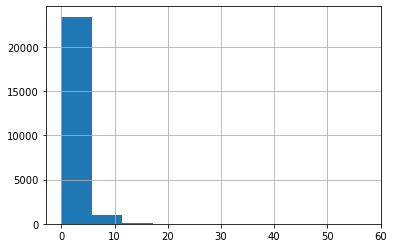

In [9]:
train["Middle School Distance"].hist()

<AxesSubplot:>

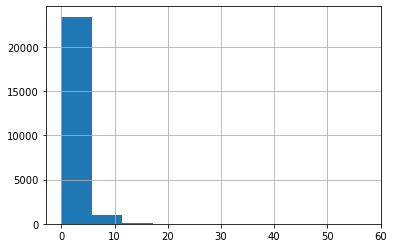

In [10]:
train["Middle School Distance"].hist()

## Heating

In [11]:
asdf = train["Heating"].value_counts()
asdf

Central                                            7280
Central Forced Air                                 4695
Central Forced Air - Gas                           3041
Forced Air                                         1977
Wall Furnace                                       1535
                                                   ... 
Stove - Wood, Other                                   1
Radiant, Daiken Mini Splits                           1
Solar, Central Forced Air - Gas, Radiant Floors       1
Propane, Electric, Wall Furnace, Wood Stove           1
Natural Gas, Electric                                 1
Name: Heating, Length: 1536, dtype: int64

In [12]:
heat_types = train["Heating"].str.lower().str.split(",").explode().str.strip().value_counts()
heat_types.head(30)
# h1 = central, forced air, forced, furnace
# h2 = radiant, heat pump, baseboard, steam, zone
# h3 = wood, stove, fireplace, fire, coal, pellet
# h4 = solar, geothermal

central                     9195
forced air                  5999
central forced air          5830
central forced air - gas    3969
gas                         3522
wall furnace                2150
other                       1667
electric                    1438
fireplace                    928
baseboard                    699
natural gas                  678
radiant                      671
heating - 2+ zones           652
propane                      631
fireplace(s)                 469
none                         453
wall                         424
floor furnace                422
heat pump                    365
wood stove                   339
solar                        284
propane / butane             230
radiant floors               219
zoned                        201
stove                        177
wood / pellet                172
stove - wood                 138
forced air - gas             120
see remarks                  117
individual room controls     102
Name: Heat

In [13]:
train["Heating features"].str.lower().str.split(",").explode().str.replace(" ", "").value_counts().shape

(60,)

## Parking

In [14]:
# Take a looka at the most common values in the parking variable.
# 156 unique values in the parking variable
parking_types_train = train["Parking"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts()

parking_types_train.head(40)
parking_types_train.index


Index(['garage', 'covered', 'garage-attached', 'driveway', 'carport',
       'garagedooropener', '0spaces', 'sidebyside', 'attached',
       'garage-detached',
       ...
       'over20spaces', 'drivethrugarage', 'uncoveredparkspaces2+',
       'morethanonespace', 'rvparking', 'unc#3', 'detachedgarage',
       'uncoveredparkingspace', 'carports-2ormore', 'sinkingarage'],
      dtype='object', length=156)

In [15]:

for ptype in parking_types_train.index:
    print(ptype)
    train[ptype] = train["Parking"].str.lower().str.replace(" ", "").str.contains(ptype)
    

garage
covered
garage-attached
driveway
carport
garagedooropener
0spaces
sidebyside
attached
garage-detached
garage-twodoor
off-street
onsite(singlefamilyonly)
interioraccess
independent
assigned
onsite
concrete
communitystructure
tandem
gated
on-street
guest
garage-singledoor
enclosed
underground/basement
private
none
controlledentrance
directaccess
detachedcarport
onsite-mapped(condoonly)
onstreet
garagefacesfront
offstreet
underground
open
autodrivewaygate
parkingspace
attachedcarport
detached
garage-threedoor
rvaccess/parking
valet
mixed
paved
shareddriveway
oversized
circulardriveway
drivewaylevel
built-instorage
convertedgarage
gravel
boat
driveway-combination
rvpotential
other
onsite-unassigned(condoonly)
rv
oversizedparking
workshopingarage
garagefacesrear
nogarage
garagefacesside
2cargarage
drivewaydownslopefromstreet
intaccessfromgarage
drivewayupslopefromstreet
mechanicallift
seeremarks
potentialrvparking
tandemcovered
sideyardaccess
asphalt
autoopener
sizelimited
rv/boatpar

/opt/anaconda3/envs/kaggle_soa_22/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


storage
unassigned
offsite
tandemuncovered
public
golfcartgarage
additionalcarport
pull-through
utilitysink
rvcovered
structure
rotational
additionalgarage
nodriveway
secured
gar#1
electricvehiclechargingstation(s)
overheightgarage
insideentrance
drivethru
unc#2
gar#3
guestspace(s)
noparkingonsite
two
notassigned
drivethrough
3cargarage
1cargarage
3ormoreparkingsp
2parkingspaces
rvpossible
4+cargarage
offstreetparking
remote
heatedgarage
cpt#1
insulated
streetparking
gar#4
one
1-10spaces
undersizedgarage
rvaccess
manualdoor
cpt#2
over20spaces
drivethrugarage
uncoveredparkspaces2+
morethanonespace
rvparking
unc#3
detachedgarage
uncoveredparkingspace
carports-2ormore
sinkingarage


## Lot

In [16]:
np.min(train["Lot"])

0.0

<AxesSubplot:>

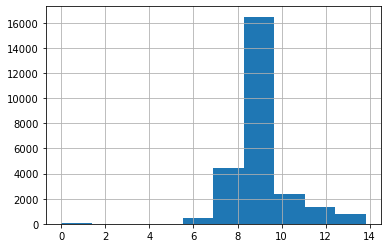

In [17]:
np.log(np.minimum(train["Lot"], 1e6) + 1).hist()

In [18]:
train[train["Lot"].isna()]

,Id,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,...,over20spaces,drivethrugarage,uncoveredparkspaces2+,morethanonespace,rvparking,unc#3,detachedgarage,uncoveredparkingspace,carports-2ormore,sinkingarage
1,1,711000,"Modern, Hip, & Bright! This beautifully mainta...",Condo,2016.0,Central,"Air Conditioning, Central",Covered,NaN,2,...,False,False,False,False,False,False,False,False,False,False
5,5,196000,HUD Home Opportunity. This 2 Bedroom/ 2 Bath h...,VacantLand,1973.0,Other,Central,"Garage - Attached, Covered",NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
9,9,432000,Live in the heart of West Hollywood at one of ...,Condo,1973.0,Central,Central Air,0 spaces,NaN,0,...,False,False,False,False,False,False,False,False,False,False
12,12,686000,GREAT LOCATION - Near USC and L A Coliseum. 2...,Unknown,1906.0,NaN,NaN,Garage,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
14,14,326000,"Smartsville, CA ~ Commute? No problem! This ho...",MobileManufactured,2005.0,Central,"Central Air, Ceiling Fan(s)",Off-street,NaN,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37418,37418,427000,"Gated Complex W/ Large Common Courtyard Area, ...",Condo,1982.0,Central,Whole House Fan,Garage,NaN,2,...,False,False,False,False,False,False,False,False,False,False
37423,37423,687000,Prime Location in LA. Center of Mid-Wilshire. ...,Condo,2007.0,Central,Central Air,Garage - Two Door,NaN,3,...,False,False,False,False,False,False,False,False,False,False
37424,37424,808000,"In the heart of the city, this two-bedroom con...",Condo,1963.0,Electric,NaN,"Attached, Enclosed, Garage Door Opener, Interi...",NaN,2,...,False,False,False,False,False,False,False,False,False,False
37430,37430,942000,Great Investment Opportunity!!!! Four Unit El ...,MultiFamily,1940.0,Wall,NaN,Covered,NaN,8,...,False,False,False,False,False,False,False,False,False,False


In [19]:
train["Type"].str.lower().str.replace(" ", "").unique()
# singlefamily
# condo, duplex, triplex, multifamily
# new
# apartment
# luxury, penthouse, rise
# vacant

array(['singlefamily', 'condo', 'townhouse', 'vacantland', 'unknown',
       'mobilemanufactured', 'multifamily', 'cooperative',
       'topfloor,2level', 'apartment', '3story', '4+story',
       '2story,duplex', 'detached,splitlevel', 'duplex',
       'luxury,townhouse,2level',
       'mid-rise(4-8),unitbelow,unitabove,3level',
       'topfloor,2level,low-rise(1-3)', 'detached',
       'topfloor,flat,low-rise(1-3)', 'acreage', 'flat,attached',
       'topfloor,flat,full,unitabove,penthouse', 'mid-rise(4-8),endunit',
       '1level,flat,low-rise(1-3),unitabove', 'mid-rise(4-8)',
       'topfloor,2level,semi-attached', 'residentiallot', 'ranch',
       'luxury,2level', 'mfd-f', 'luxury,mid-rise(4-8)',
       '2story,full,attached', '2level,detached', '3level,live/work',
       'full,semi-attached', 'newconstruction,low-rise(1-3)',
       'hi-rise(9+)', 'triplex', '2story', 'residential',
       'low-rise(1-3),full,unitabove', 'mid-rise(4-8),topfloor,unitbelow',
       'doublewide', 'uni

In [20]:
train["Type"].str.lower().str.replace(" ", "").value_counts().head(50)

singlefamily                            24635
condo                                    6630
townhouse                                2040
unknown                                  1291
multifamily                               987
mobilemanufactured                        801
vacantland                                606
apartment                                 149
cooperative                                34
mfd-f                                      20
residentiallot                             16
2story                                     15
acreage                                    12
duplex                                     11
3story                                      9
manufacturedhome                            7
3story,duplex                               7
31                                          7
mid-rise(4-8)                               6
topfloor                                    6
hi-rise(9+)                                 6
detached,2story                   

In [21]:
train.median()["Sold Price"]

/opt/anaconda3/envs/kaggle_soa_22/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


1042000.0

Impute missing values for certain numeric variables

## Last Sold

In [22]:
train["Last Sold On"].fillna("1/1/2021")

0        12/28/2018
1          1/1/2021
2          1/1/2021
3          1/1/2021
4          1/1/2021
            ...    
37434    12/28/2012
37435     4/30/1999
37436     9/16/1998
37437      1/1/2021
37438      8/7/2003
Name: Last Sold On, Length: 37439, dtype: object

In [23]:
asdf = (pd.to_datetime("1/1/2021") - pd.to_datetime(train["Last Sold On"].fillna("1/1/2021"))).dt.days
asdf

0         735
1           0
2           0
3           0
4           0
         ... 
37434    2926
37435    7917
37436    8143
37437       0
37438    6357
Name: Last Sold On, Length: 37439, dtype: int64

In [24]:
np.min(pd.to_datetime("1/1/2021") - pd.to_datetime(asdf))

Timedelta('18627 days 23:59:59.999982645')

## Flooring

In [25]:
train["Flooring"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts().head(40)

tile                      13522
carpet                    11949
wood                       9414
hardwood                   8556
laminate                   6338
vinyl/linoleum             1862
linoleum/vinyl             1052
stone                       774
other                       770
vinyl                       769
marble                      478
concrete                    405
ceramictile                 272
travertine                  237
linoleum                    232
slate                       219
bamboo                      212
simulatedwood               204
seeremarks                  110
parquet                      74
carpeted                     73
granite                      71
engineeredwood               64
mixed                        62
hardwoodflrsthroughout       61
other-rmks                   42
mexicantile                  33
softwood                     32
cement                       19
brick                        17
cork                         12
naturals

## Bedrooms

In [26]:
train["Bedrooms"].unique()

array(['5', '2', '4', 'Walk-in Closet', nan,
       'Ground Floor Bedroom, Master Bedroom on Ground Floor, More than One Bedroom on Ground Floor',
       '3',
       'Ground Floor Bedroom, Master Suite / Retreat, More than One Bedroom on Ground Floor, Walk-in Closet',
       '0',
       'Ground Floor Bedroom, Master Bedroom on Ground Floor, More than One Bedroom on Ground Floor, Walk-in Closet',
       '1', 'Walk-in Closet, Master Suite / Retreate - 2+',
       'Ground Floor Bedroom, Walk-in Closet, More than One Master Bedroom on Ground Floor',
       '6', 'Loft Bedroom', 'Master Bedroom on Ground Floor',
       'Master Suite / Retreat',
       'Ground Floor Bedroom, Master Suite / Retreat',
       'Master Bedroom on Ground Floor, Master Suite / Retreat',
       'Master Suite / Retreat, Walk-in Closet',
       'More than One Bedroom on Ground Floor, Master Suite / Retreate - 2+, More than One Master Bedroom on Ground Floor',
       '7',
       'Ground Floor Bedroom, Walk-in Closet, Ma

## Tax Value

In [27]:
train.replace('#DIV/0!', np.NaN)[~train["Tax assessed value"].isna()]["Tax assessed value"].astype('float').median()

599767.0

In [28]:
train["Tax assessed value"].replace('#DIV/0!', np.NaN).astype('float').fillna(0)

0         349821.0
1              0.0
2        1718863.0
3         997908.0
4          77854.0
           ...    
37434    1807714.0
37435     394375.0
37436     596851.0
37437     188119.0
37438    1044984.0
Name: Tax assessed value, Length: 37439, dtype: float64

## Appliances

In [29]:
train["Appliances included"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts().head(20)

dishwasher          21144
refrigerator        16867
microwave           12971
washer              12490
dryer               12102
range/oven          10990
garbagedisposal      9734
disposal             6048
freezer              2484
rangehood            2119
gasrange             1185
trashcompactor       1098
gaswaterheater        918
gasoven               756
gascooktop            713
oven                  630
range                 546
doubleoven            470
selfcleaningoven      458
barbecue              423
Name: Appliances included, dtype: int64

## List Date

<AxesSubplot:>

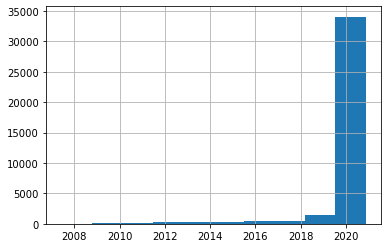

In [30]:
pd.to_datetime(train["Listed On"]).hist()

In [31]:
pd.to_datetime(train["Listed On"]).dt.year + pd.to_datetime(train["Listed On"]).dt.month/12

0        2020.583333
1        2020.500000
2        2020.750000
3        2020.500000
4        2020.333333
            ...     
37434    2020.333333
37435    2020.333333
37436    2020.333333
37437    2020.166667
37438    2020.083333
Name: Listed On, Length: 37439, dtype: float64

## City

In [32]:
train["City"].value_counts().head(20)

Los Angeles       8799
San Jose          5666
San Francisco     4202
San Mateo          898
Santa Clara        896
Santa Cruz         708
Sunnyvale          691
Los Gatos          563
Morgan Hill        495
Redwood City       481
Gilroy             451
Compton            449
Mountain View      438
Palo Alto          425
Milpitas           400
Aptos              393
Los Altos          382
Culver City        349
West Hollywood     333
Watsonville        330
Name: City, dtype: int64

## Region

In [33]:
# basically the same as city so not using it
train["Region"].value_counts().head(20)

Los Angeles       8860
San Jose          5863
San Francisco     4201
San Mateo          720
Santa Clara        703
Santa Cruz         700
Sunnyvale          691
Los Gatos          522
Morgan Hill        495
Gilroy             450
Compton            441
Mountain View      438
Milpitas           400
Aptos              393
Redwood City       377
Palo Alto          361
West Hollywood     346
San Carlos         313
Culver City        302
Menlo Park         298
Name: Region, dtype: int64

## Type

In [34]:
train["Type"].str.lower().str.replace(" ", "").value_counts().head(20)

singlefamily          24635
condo                  6630
townhouse              2040
unknown                1291
multifamily             987
mobilemanufactured      801
vacantland              606
apartment               149
cooperative              34
mfd-f                    20
residentiallot           16
2story                   15
acreage                  12
duplex                   11
3story                    9
manufacturedhome          7
3story,duplex             7
31                        7
mid-rise(4-8)             6
topfloor                  6
Name: Type, dtype: int64

## Laundry

In [90]:
train["Laundry features"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts().head(50)



inside                     8245
washer/dryer               4837
ingarage                   4601
laundryroom                2443
inutilityroom              2186
laundrycloset              1971
electricityhookup(220v)    1871
insideroom                 1212
dryer                      1034
washer                     1009
gashookup                   985
washerhookup                903
inunit                      813
inkitchen                   797
tub/sink                    775
gasdryerhookup              722
upperfloor                  714
hookupsonly                 650
community                   619
stackable                   519
outside                     491
electricityhookup(110v)     458
seeremarks                  451
none                        395
gas&electricdryerhookup     351
room                        350
cabinets                    343
upperlevel                  325
insidearea                  293
commonarea                  275
electricdryerhookup         266
communit

# Data Pre-Processing

In [6]:
# Reread data to ensure we're using accurate data
train = pd.read_csv("../data/advanced_train.csv", low_memory = False)
test = pd.read_csv("../data/advanced_test.csv", low_memory = False)

In [ ]:

# Make some manual adjustments to prices to remove outliers
train["Last Sold Price"] = np.where((train["Last Sold Price"] / train["Sold Price"] > 10) |
                                     (train["Last Sold Price"] / train["Sold Price"] < 0.1),
                                     0,
                                     train["Last Sold Price"])
train["Listed Price"] = np.where((train["Listed Price"] / train["Sold Price"] > 10) |
                                  (train["Listed Price"] / train["Sold Price"] < 0.1),
                                 0,
                                 train["Listed Price"])

In [7]:
#imp = IterativeImputer()
imp = KNNImputer(n_neighbors = 10)

imp_vars = ["Total interior livable area", "Full bathrooms", "Bathrooms",
           "Total spaces", "Elementary School Score", "Elementary School Distance", 
           "Middle School Score", "Middle School Distance", "High School Score",
           "High School Distance", "Year built", "Garage spaces"] # , "Lot"

In [8]:
imp.fit(train[imp_vars])

KNNImputer(n_neighbors=10)

In [9]:
parking_types_train = train["Parking"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts()
heating_types_train = train["Heating"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts()
flooring_types_train = train["Flooring"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts()
appliance_types_train = train["Appliances included"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts()
cities_train = train["City"].value_counts().head(200)
types_train = train["Type"].str.lower().str.replace(" ", "").value_counts().head(20)
laundry_types_train = train["Laundry features"].str.lower().str.replace(" ", "").str.split(",").explode().value_counts()


train_medians = train.median()
test_medians = test.median()

def preprocess_data(df, imp, imp_v, meds, ptypes_train, htypes_train, ftypes_train, atypes_train, cities, ttypes_train, ltypes_train):
    
    df[imp_v] = imp.transform(df[imp_v]) 
    
    df["Total interior livable area"] = df["Total interior livable area"].fillna(meds["Total interior livable area"])
    
    df["Bathrooms"] = df["Bathrooms"].fillna(meds["Bathrooms"])
    
    df["Total spaces"] = df["Total spaces"].fillna(meds["Total spaces"])
    df["Total spaces"] = np.abs(np.minimum(df["Total spaces"], 30))
    
    df["Elementary School Score"] = df["Elementary School Score"].fillna(meds["Elementary School Score"])
    df["Elementry School Distance"] = df["Elementary School Distance"].fillna(meds["Elementary School Distance"])
    
    df["Middle School Score"] = df["Middle School Score"].fillna(meds["Middle School Score"])
    df["Middle School Distance"] = df["Middle School Distance"].fillna(meds["Middle School Distance"])

    df["High School Score"] = df["High School Score"].fillna(meds["High School Score"])
    df["High School Distance"] = df["High School Distance"].fillna(meds["High School Distance"])
    
    df["Year built"] = df["Year built"].fillna(meds["Year built"])
    df["Year built"] = np.maximum(df["Year built"], 1870)
    df["Year built"] = np.minimum(df["Year built"], 2022)
    
    df["state_ind"] = df["State"] == "CA"
    
    df["Garage spaces"] = df["Garage spaces"].fillna(meds["Garage spaces"])
    df["Garage spaces"] = np.maximum(df["Garage spaces"], 0)
    df["Garage spaces"] = np.minimum(df["Garage spaces"], 20)
    
    
    df["Full bathrooms"] = df["Full bathrooms"].fillna(meds["Full bathrooms"])

    # Doesn't seem to matter which impute strategy I use
    #df["l1"] = df["Lot"].fillna(meds["Lot"])
    df["l1"] = df["Lot"].fillna(0)
    
    df["Last Sold Price"] = df["Last Sold Price"].fillna(0)
    df["Last Sold Days"] = (pd.to_datetime("1/1/2021") - pd.to_datetime(df["Last Sold On"].fillna("1/1/2021"))).dt.days
    
    df["Tax assessed value"] = df["Tax assessed value"].replace('#DIV/0!', np.NaN).astype('float').fillna(0)
    
    df["Listed On"] = pd.to_datetime(df["Listed On"]).dt.year + (pd.to_datetime(df["Listed On"]).dt.month/12)
    
    for htype in htypes_train.index:
        df[("h_" + htype)] = df["Heating"].str.lower().str.replace(" ", "").str.contains(htype, na=False)
    
    for ptype in ptypes_train.index:
        df[("p_" + ptype)] = df["Parking"].str.lower().str.replace(" ", "").str.contains(ptype, na=False)
    
    for ftype in ftypes_train.index:
        df[("f_" + ftype)] = df["Flooring"].str.lower().str.replace(" ", "").str.contains(ftype, na=False)

    for atype in atypes_train.index:
        df[("a_" + atype)] = df["Appliances included"].str.lower().str.replace(" ", "").str.contains(atype, na=False)

    for city in cities.index:
        df[city] = df["City"].str.contains(city, na=False)
        
    for ttype in ttypes_train.index:
        df[("t_" + ttype)] = df["Type"].str.lower().str.replace(" ", "").str.contains(ttype, na=False)
    
    for ltype in ltypes_train.index:
        df[("l_" + ltype)] = df["Laundry features"].str.lower().str.replace(" ", "").str.contains(ltype, na=False)

        
    df["r1"] = df["Listed Price"] / (df["Last Sold Price"] + 0.1)
    df["r2"] = df["Last Sold Price"] / (df["Tax assessed value"] + 0.1)
    df["r3"] = df["Tax assessed value"] / (df["Listed Price"] + 0.1)
    
    return df

In [10]:
train_p = preprocess_data(train, imp, imp_vars, train_medians, parking_types_train, 
                          heating_types_train, flooring_types_train, 
                          appliance_types_train, cities_train, types_train,
                         laundry_types_train)


Determine the target

In [11]:
#y = np.log(train["Sold Price"])
y = train["Sold Price"]

In [131]:
# Get this feature importance from training a model below with max_features = None. 
# Then use the top X features in a model with max_features = 'sqrt'
feat_imp_orig = feat_importances

In [41]:
pred_vars = ["Listed Price", "Total interior livable area", "Bathrooms", 
             "Year built", "High School Score", "Garage spaces", "state_ind", 
            "Elementary School Score", "Full bathrooms",
            "Total spaces", "High School Distance", 
            "l1", "Last Sold Price", "Last Sold Days", "Tax assessed value", "Listed On", 
            "r1", "r2", "r3"] + list("p_" + parking_types_train.index) + list("h_" + heating_types_train.index) + list("f_" + flooring_types_train.index) + list("a_" + appliance_types_train.index) + list(cities_train.index) + list("t_" + types_train.index) + list("l_" + laundry_types_train.index)

#pred_vars = list(feat_imp_orig.nlargest(100).index)
# Used top 70/300
# Used top 80/360

X = train_p[pred_vars]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 58)

# Models

In [79]:
params = {"n_estimators":50,
          "learning_rate":0.15,
          "max_depth":3,
          "random_state":56,
          "subsample":1,
          'max_features':None, # None or sqrt
          "loss":'squared_error'}

In [80]:
# Only run this cell after the full model is run and you want to do a limited variable run
pred_vars = ['Atherton',
 'Los Altos',
 'San Francisco',
 'Listed Price',
 'Last Sold Price',
 'Elementary School Score',
 'p_onsite',
 'Year built',
 'r3',
 'p_driveway',
 'Tax assessed value',
 'h_gas',
 'a_dishwasher',
 'r2',
 'Last Sold Days',
 'p_attached',
 't_mobilemanufactured',
 'r1',
 'Listed On',
 'Garage spaces',
 'High School Distance',
 'Total interior livable area',
 'l1',
 'p_other',
 'f_tile',
 'a_range/oven',
 'f_hardwood',
 't_singlefamily',
 'Bathrooms',
 'f_wood',
 't_condo',
 'Full bathrooms',
 'High School Score',
 'l_room']#list(feat_importances.nlargest(25).index)
X_train = X_train[pred_vars]
X_test = X_test[pred_vars]

In [81]:
model = GradientBoostingRegressor(verbose = 1).set_params(**params)

In [82]:
model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 2031682046925.3113            3.06s
         2 1562667833303.5215            3.02s
         3 1219282508496.3958            2.92s
         4 960683370371.3416            2.88s
         5 768743037119.2983            2.83s
         6 626404325615.8175            2.78s
         7 513380698638.9340            2.71s
         8 433176583683.9359            2.65s
         9 369089037007.6508            2.58s
        10 321969623192.0947            2.51s
        20 164387611569.1473            1.92s
        30 131937622069.3746            1.28s
        40 118958618466.1937            0.64s
        50 110102457614.5919            0.00s


GradientBoostingRegressor(learning_rate=0.15, n_estimators=50, random_state=56,
                          subsample=1, verbose=1)

In [83]:
model.score(X_test, y_test)

# 0.8979036811661909
# 0.8694607353500836

0.872888057644053

In [87]:
feat_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
feat_importances.nlargest(50)#.plot(kind='barh')

Listed Price                   0.912637
Tax assessed value             0.042319
Listed On                      0.012597
Total interior livable area    0.009694
r1                             0.008172
Last Sold Price                0.004044
Elementary School Score        0.001952
Full bathrooms                 0.001663
r3                             0.001527
l1                             0.001139
Los Altos                      0.001077
Year built                     0.000857
Atherton                       0.000398
a_range/oven                   0.000354
r2                             0.000322
High School Score              0.000286
h_gas                          0.000237
Bathrooms                      0.000212
l_room                         0.000142
San Francisco                  0.000134
High School Distance           0.000123
f_hardwood                     0.000069
p_onsite                       0.000046
Garage spaces                  0.000000
p_driveway                     0.000000


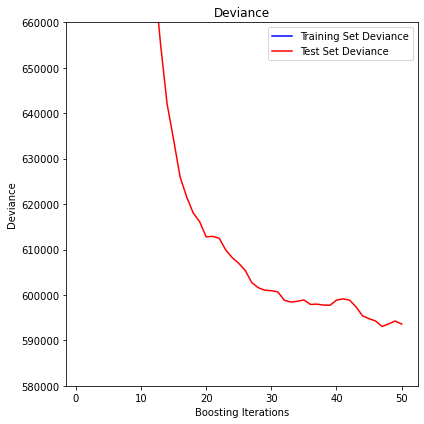

593060.3755510302


In [85]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    #test_score[i] = model.loss_(y_test, y_pred)   # This is just squared error
    test_score[i] = np.sqrt(((y_pred - y_test) ** 2).mean())  # this is RMSE

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1, model.train_score_,
    "b-", label="Training Set Deviance",
)
plt.plot(np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance")
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
#plt.ylim(0.03, 0.06)
plt.ylim(5.8e5, 6.6e5)
fig.tight_layout()
plt.show()
print(np.min(test_score))

# 515801.10557718197

# Error Investigation
Looking into train examples where the error is really high

In [143]:
errs = y_pred - y_test

In [144]:
erratio = y_pred / y_test

In [145]:
erratio.nlargest(20)

2523     26.605600
4099     17.759083
29773     9.926352
33304     7.828099
11533     7.824335
33448     7.336106
33035     6.859746
18216     6.723972
16999     6.037127
16989     5.755412
33480     5.723426
37149     5.704965
14600     5.685111
35142     5.581364
29101     5.448732
25998     5.353427
22799     5.271661
21197     5.185935
35946     5.135436
16570     5.093125
Name: Sold Price, dtype: float64

In [123]:
X_test[errs > 1e6].join(train["Sold Price"])[["Listed Price", "Sold Price", "Last Sold Price", "Last Sold Days"]]



,Listed Price,Sold Price,Last Sold Price,Last Sold Days
2381,0,133000,0.0,773
11533,16094000,1726000,0.0,0
31772,7064000,6082000,5300000.0,2051
2941,5176888,3344000,0.0,0
17139,19170000,10935000,6925000.0,563
...,...,...,...,...
17470,2335000,1418000,1652100.0,161
9857,1601000,403000,1960000.0,2052
27856,17592000,14321000,15600000.0,966
23596,18898000,10455000,0.0,0


In [71]:
train.iloc[7251].head(50)

Id                                                                          7251
Sold Price                                                                273000
Summary                        Enjoy the privacy of this end unit, located at...
Type                                                                SingleFamily
Year built                                                                1988.0
Heating                                                          Forced air, Gas
Cooling                                                                     None
Parking                                       Garage, Garage - Attached, Covered
Lot                                                                       1507.0
Bedrooms                                                                       3
Bathrooms                                                                    3.9
Full bathrooms                                                               3.5
Total interior livable area 

# Feature Importance

In [31]:
top25_None = ['Listed Price', 'Tax assessed value', 'Listed On',
       'Total interior livable area', 'r1', 'Last Sold Price',
       'Elementary School Score', 'Full bathrooms', 'l1', 'Los Altos', 'r3',
       'Year built', 'Atherton', 'l_room', 'Bathrooms', 'High School Score',
       'h_gas', 'r2', 'Last Sold Days', 'a_range/oven', 'San Francisco',
       'High School Distance', 'Garage spaces', 'f_tile', 'p_driveway']

In [32]:
#feat_importances.nlargest(25).index
top25_sqrt = ['Listed Price', 'Tax assessed value', 'r1', 'Full bathrooms',
       'Total interior livable area', 'Last Sold Price', 'Bathrooms', 'f_wood',
       'Elementary School Score', 'High School Score', 'r3', 't_singlefamily',
       'Atherton', 'f_hardwood', 't_condo', 'Listed On', 'Los Altos',
       'San Francisco', 'Year built', 'High School Distance', 'p_attached',
       'p_other', 'a_dishwasher', 't_mobilemanufactured', 'p_onsite']

In [37]:
asdf = ['Atherton',
 'Los Altos',
 'San Francisco',
 'Listed Price',
 'Last Sold Price',
 'Elementary School Score',
 'p_onsite',
 'Year built',
 'r3',
 'p_driveway',
 'Tax assessed value',
 'h_gas',
 'a_dishwasher',
 'r2',
 'Last Sold Days',
 'p_attached',
 't_mobilemanufactured',
 'r1',
 'Listed On',
 'Garage spaces',
 'High School Distance',
 'Total interior livable area',
 'l1',
 'p_other',
 'f_tile',
 'a_range/oven',
 'f_hardwood',
 't_singlefamily',
 'Bathrooms',
 'f_wood',
 't_condo',
 'Full bathrooms',
 'High School Score',
 'l_room']

In [38]:
len(asdf)

34

In [36]:
list(set(top25_sqrt) | set(top25_None))

['Atherton',
 'Los Altos',
 'San Francisco',
 'Listed Price',
 'Last Sold Price',
 'Elementary School Score',
 'p_onsite',
 'Year built',
 'r3',
 'p_driveway',
 'Tax assessed value',
 'h_gas',
 'a_dishwasher',
 'r2',
 'Last Sold Days',
 'p_attached',
 't_mobilemanufactured',
 'r1',
 'Listed On',
 'Garage spaces',
 'High School Distance',
 'Total interior livable area',
 'l1',
 'p_other',
 'f_tile',
 'a_range/oven',
 'f_hardwood',
 't_singlefamily',
 'Bathrooms',
 'f_wood',
 't_condo',
 'Full bathrooms',
 'High School Score',
 'l_room']

# Hyperparameter Optimization

In [98]:
BayesSearchCV?

In [376]:
opt = BayesSearchCV(
    GradientBoostingRegressor(random_state = 56,loss = 'squared_error'),
    {
        'n_estimators': (25, 250),
        'learning_rate': (.01, .5, 'log-uniform'),
        'max_depth': (2, 6),  # integer valued parameter
    },
    n_iter = 30,
    cv = 3,
    verbose = 1
)

In [377]:
opt.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=56),
              n_iter=30,
              search_spaces={'learning_rate': (0.01, 0.5, 'log-uniform'),
                             'max_depth': (2, 6), 'n_estimators': (25, 250)},
              verbose=1)

In [378]:
opt.score(X_test, y_test)

# 0.930401 with no subsampling
# 0.929161025403613 with subsampling, 50 iterations


0.8861050552210015

In [380]:
opt.best_estimator_.max_depth, opt.best_estimator_.learning_rate, opt.best_estimator_.n_estimators, opt.best_estimator_.subsample

# (4, 0.019076781177538346, 500, 1.0) with no subsampling
# (5, 0.011876032175591269, 376, 0.44775503528274996) with subsampling (50 iterations)


(4, 0.07311285746741947, 91, 1.0)

In [38]:
params["max_depth"] = opt.best_estimator_.max_depth
params["learning_rate"] = opt.best_estimator_.learning_rate
params["n_estimators"] = opt.best_estimator_.n_estimators
params["subsample"] = opt.best_estimator_.subsample

# Train final model
Use all the data

In [88]:
print(params)
print(pred_vars), len(pred_vars)

{'n_estimators': 50, 'learning_rate': 0.15, 'max_depth': 3, 'random_state': 56, 'subsample': 1, 'max_features': None, 'loss': 'squared_error'}
['Atherton', 'Los Altos', 'San Francisco', 'Listed Price', 'Last Sold Price', 'Elementary School Score', 'p_onsite', 'Year built', 'r3', 'p_driveway', 'Tax assessed value', 'h_gas', 'a_dishwasher', 'r2', 'Last Sold Days', 'p_attached', 't_mobilemanufactured', 'r1', 'Listed On', 'Garage spaces', 'High School Distance', 'Total interior livable area', 'l1', 'p_other', 'f_tile', 'a_range/oven', 'f_hardwood', 't_singlefamily', 'Bathrooms', 'f_wood', 't_condo', 'Full bathrooms', 'High School Score', 'l_room']


(None, 34)

In [89]:
model = GradientBoostingRegressor(verbose = 1).set_params(**params).fit(X[pred_vars], y)

      Iter       Train Loss   Remaining Time 
         1 2063532057324.3831            4.25s
         2 1589109399233.4773            4.13s
         3 1242357364017.7385            4.10s
         4 987490701687.3326            4.04s
         5 795177037953.5508            4.00s
         6 654259215447.6322            3.94s
         7 545473508598.2091            3.90s
         8 463388872850.3335            3.83s
         9 401069292967.4508            3.75s
        10 351785441665.7825            3.66s
        20 186686622836.2960            2.76s
        30 150941945859.3772            1.82s
        40 137941809476.7122            0.90s
        50 129551221479.2663            0.00s


# Make Predictions

Do the same pre-processing on the test data that we do on the train data

In [23]:
test_p = preprocess_data(test, imp, imp_vars, train_medians, parking_types_train, 
                         heating_types_train, flooring_types_train, 
                         appliance_types_train, cities_train, types_train,
                        laundry_types_train)

In [90]:
test["Sold Price"] = model.predict(test_p[pred_vars])

In [91]:
test[["Id", "Sold Price"]].to_csv("../submission.csv", index = False)

In [92]:
test["Sold Price"].median(), test["Listed Price"].median()

(798241.9940159721, 836000.0)

# Ideas

Things to try out for the future:
 - Target Ideas:
  - Target is log of the price
  - Target is the actual dollar of sale price (GOLD STAR - THIS WORKS BETTER THAN LOG PRICE)
  - Target is the difference between the price and the list price
  
 - Variable Ideas:
  - Get a home price index and map to list date?
  - Do something with summary, sentiment analysis?
  - build a sub-model for records with no values from the price variables?

<AxesSubplot:>

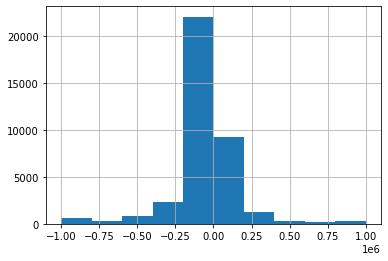

In [198]:
np.minimum(np.maximum(train["Sold Price"] - train["Listed Price"], -1e6), 1e6).hist()